# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#ваш код 
data = pd.read_csv('Advertising.csv')
data.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [3]:
#ваш код 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


в данных нет пропусков

In [5]:
#ваш код 


**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [51]:
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [52]:
#ваш код 
X = np.array(data .drop(['sales', 'Unnamed: 0'], axis = 1))
y = np.array(data['sales'])

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [53]:
import numpy as np

X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [54]:
X_norm = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(n, m)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., m$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{m} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{m} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{n} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{m}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{n}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [55]:
# ваш код 
num_iters = 1000
m = X_norm.shape[0]
n = X_norm.shape[1]
w = np.zeros([n, 1])

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X_norm[:,0:k] @ w[0:k]) + (X_norm[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X_norm[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum(((X_norm @ w) - y)**2)/(len(y))


In [56]:
w

array([[ 41.56217205],
       [110.13144155],
       [ 73.52860638],
       [ -0.55006384]])

Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [58]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X_norm, y)
 
print(model.coef_)

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Если вы все сделали верно, они должны практически совпасть!

`коеффициенты абсолютно одинаковы`

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [81]:
#ваш код
X_st = (X[:,1:]-X[:,1:].mean())/X[:, 1:].std()
X_st[:10]

array([[ 2.12559023, -0.37983282,  0.02926902],
       [-0.29254039, -0.36028974, -0.28472315],
       [-0.64822447, -0.27430018,  0.03057189],
       [ 1.10153276, -0.33423229, -0.11013829],
       [ 1.48327429, -0.73160829, -0.11144117],
       [-0.7589686 , -0.23521401,  0.1048356 ],
       [-0.12316701, -0.44497642, -0.56614353],
       [ 0.69373379, -0.61695554, -0.72118531],
       [-0.76027147, -0.84495816, -0.85928975],
       [ 1.73081999, -0.8384438 , -0.59610959]])

**Добавим единичный столбец**

In [82]:
X_st = np.hstack([np.ones(X_st.shape[0]).reshape(-1, 1), X_st])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [369]:
#ваш код
def mse(real, predicted):

    return ((real-predicted)**2).sum()/len(real)

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [370]:
#ваш код
naiv = np.array([y.mean()]*len(y)).reshape(len(y), 1)
mse(y, naiv)

27.085743750000002

In [371]:
# Сравним значение моей функции со значением из склёрна
from sklearn.metrics import mean_squared_error
mean_squared_error(y, naiv)
# видно что "рукописная" функция ошибки работает правильно

27.085743750000002

**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [379]:
#ваш код
def lin_pred(predicats, weights):
    return predicats@weights

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [675]:
#ваш код
def stoch_grad_step(X, y, w, ind, lr):
    return w - 2*lr*X[ind]*( lin_pred(X[ind], w) - y[ind])
# Здесь не нужно делить на  l и искать сумму ошибок, так как мы считаем предсказание и градиент только для одного элемента (одного инпута)

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [ ]:
# ваш код
def stochastic_gradient_descent(X, y, w, lr, max_iter, evklid):
    """
    Perform stochastic gradient descent for linear regression.

    Parameters:
    - X: Feature matrix.
    - y: Target values.
    - w: Initial weights of the model.
    - lr: Learning rate for the update.
    - max_iter: Maximum number of iterations.
    - evklid: Threshold for the Euclidean distance between consecutive weight vectors to stop iterations.

    Returns:
    - Updated weights after stochastic gradient descent.
    - List of mean squared errors for each iteration.
    - List of Euclidean distances between consecutive weight vectors for each iteration.
    """
    np.random.seed(142)
    loss_list, evkl_list = [], []
    evk = 1e20

    for _ in range(int(max_iter)):
        # Check if the Euclidean distance is greater than the threshold
        if evk > evklid:
            # Randomly select an index for stochastic gradient descent
            ind = np.random.randint(X.shape[0])

            # Perform one step of stochastic gradient descent
            w_new = stoch_grad_step(X, y, w, ind, lr)

            # Calculate Euclidean distance between consecutive weight vectors
            evk = np.sqrt(np.sum((w_new - w)**2))
            evkl_list.append(evk)

            # Calculate mean squared error and update weights
            loss_list.append(mse(y, lin_pred(X, w_new)))
            w = w_new
        else:
            # Break the loop if the Euclidean distance is less than or equal to the threshold
            break

    return w, loss_list, evkl_list

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

In [789]:
# ваш код
weigts, losses, evkl = stochastic_gradient_descent(X_st, y, w=np.zeros(shape = X_st.shape[1]), lr=0.01, max_iter = 500, evklid =1e-9)

In [790]:
max(losses), min(losses)

(39352.93877418734, 8648.80021580255)

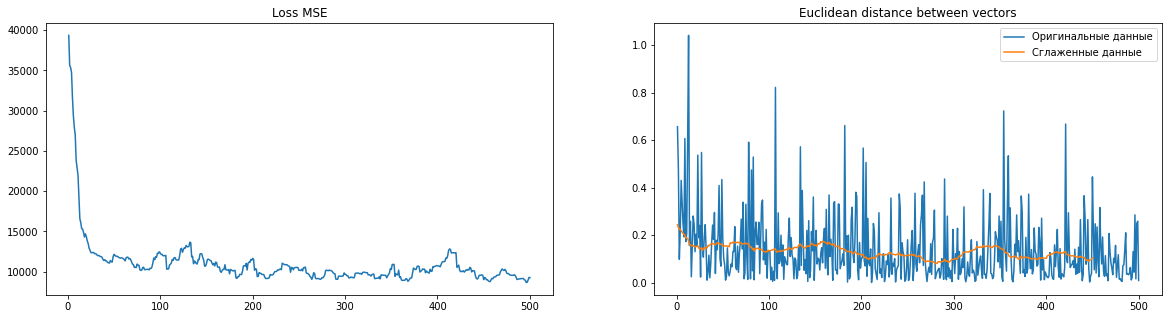

In [791]:
plt.figure(figsize = (20, 5))
plt.subplot(121)
plt.plot(list(range(1, len(losses) + 1)), losses)
plt.title('Loss MSE')
plt.subplot(122)
plt.plot(list(range(1, len(evkl) + 1)), evkl, label='Оригинальные данные')
smooth = [np.array(evkl[i:i+50]).mean() for i in range(len(evkl) -50)]
plt.plot(list(range(1, len(smooth) + 1)), smooth, label='Сглаженные данные')
plt.legend()
plt.title('Euclidean distance between vectors');

**Выведите вектор весов, к которому сошелся метод.**

In [793]:
# ваш код
weigts

array([9.97906194, 3.90901882, 0.61484863, 0.01644037])

**Выведите среднеквадратичную ошибку на последней итерации.**

In [792]:
# ваш код
losses[-1]

9257.286605112185

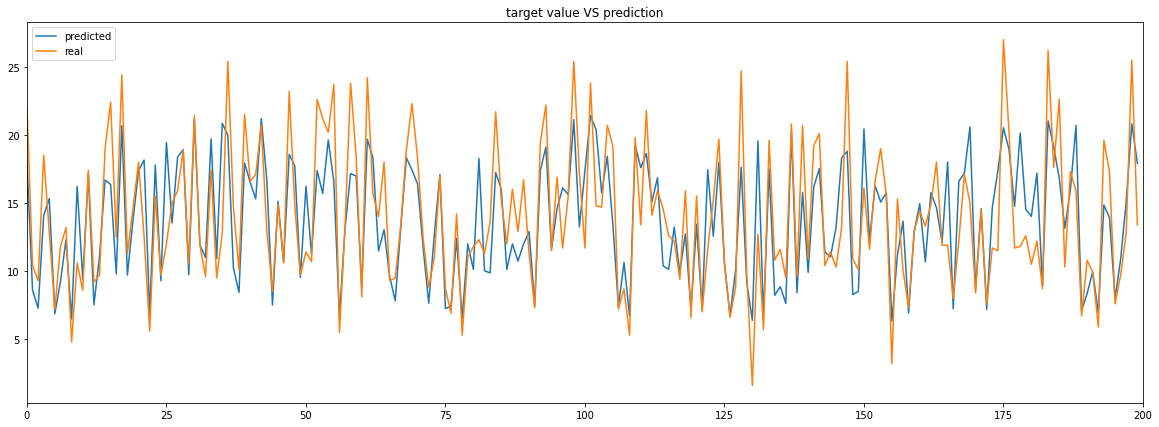

In [798]:
plt.figure(figsize = (20, 7))
plt.plot(list(range(len(y))), lin_pred([X_st], weigts).flatten(), label = 'predicted')
plt.plot(list(range(len(y))), y, label = 'real')
plt.xlim(0, 200)
plt.legend()
plt.title('target value VS prediction');

Выводы: я не уверена что с градиентным спуском все получилось так как надо, так как значение ошибки достаточно большое

я попробовала варьировать количество итераций и лернинг рейт и выбрала наиболее удачные (на мой взгляд) показатели

такая большая ошибка возможно получилась из-за неудачной точки инициализации, возможной одной из причин почему не получилось хорошего результата стало то что мы вычисляем градиент только по предсказанию только одного рандомному элемента


в целом не смотря на то что значение ошибки достаточно большое, видно что в целом модель уловила тенденцию